In [1]:
import pandas as pd
import numpy as np

import urllib
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

import webbrowser
import os
import bs4,  re
from bs4 import BeautifulSoup
import requests
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

### The cell below opens (and converts to a dataframe) a csv file containing a URL that, when opened, will automatically download a csv file tuned to the prescribed search.  For example, the first search performed looked (1) myeloma, (2) USA, (3) Recruiting AND Non yet recruiting AND Active, but no longer recruiting, (4) Car-T.  The URL syntax can be found at ClinicalTrials.gov site.




In [2]:
df = pd.read_csv('./keyword_search.csv')

In [3]:
df.head()

,label,url
0,CarT,https://clinicaltrials.gov/ct2/results/downloa...
1,MM,https://clinicaltrials.gov/ct2/results/downloa...


### The cells below open the url stored in the dataframe, and then moves the csv file from download to the desired file location


In [4]:
url = df['url'].tolist()
target = url[1]


urllib.urlretrieve(target, 'data/results.csv')



('data/results.csv', <httplib.HTTPMessage instance at 0x000000002154B388>)

In [5]:
df = pd.read_csv('data/results.csv')

In [6]:
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT02579824,Ascending Dose and Exploratory Expansion Study...,NaN,Recruiting,No Results Available,Myeloma,Drug: DS-3032b,Maximum Tolerated Dose (MTD) of DS-3032b in Pa...,M.D. Anderson Cancer Center|Daiichi Sankyo UK ...,...,2015-0101|NCI-2015-01873,August 2016,August 2021,August 2021,"October 20, 2015",NaN,"September 18, 2018","University of Texas MD Anderson Cancer Center,...",NaN,https://ClinicalTrials.gov/show/NCT02579824
1,2,NCT03492138,"Ixazomib, ONC201, and Dexamethasone in Relapse...",NaN,Recruiting,No Results Available,Multiple Myeloma,Drug: ONC201|Drug: Ixazomib|Drug: Dexamethasone,Recommended phase II dose (RPTD)|Disease contr...,Ajai Chari|Icahn School of Medicine at Mount S...,...,GCO 17-2680,"March 26, 2018","March 15, 2023","March 15, 2023","April 10, 2018",NaN,"April 10, 2018","Icahn School of Medicine at Mount Sinai, New Y...",NaN,https://ClinicalTrials.gov/show/NCT03492138
2,3,NCT03601078,An Efficacy and Safety Study of bb2121 in Subj...,KarMMa-2,Recruiting,No Results Available,Multiple Myeloma,Biological: bb2121,Overall response rate (ORR)- Cohort 1|Complete...,Celgene,...,BB2121-MM-002|U1111-1216-4209|2018-000264-28,"November 13, 2018","March 12, 2025","March 12, 2025","July 26, 2018",NaN,"November 8, 2018","Sarah Cannon Research Inst, Nashville, Tenness...",NaN,https://ClinicalTrials.gov/show/NCT03601078
3,4,NCT03464916,Study to Evaluate the Safety and Efficacy of A...,NaN,Recruiting,No Results Available,Relapsed or Refractory Multiple Myeloma,Biological: CAR2 Anti-CD38 A2 CAR-T Cells,Determine the MTD|Determine the CAR2 Anti-CD38...,"Sorrento Therapeutics, Inc.",...,SOR-CART-MM-001,"April 5, 2018",April 2020,"September 1, 2020","March 14, 2018",NaN,"June 27, 2018","University of Pennsylvania, Abramson Cancer Ce...",NaN,https://ClinicalTrials.gov/show/NCT03464916
4,5,NCT03590652,"Daratumumab, Ixazomib, Pomalidomide, and Dexam...",NaN,Recruiting,No Results Available,Relapsed/Refractory Multiple Myeloma,Drug: Ixazomib|Drug: Pomalidomide|Drug: Dexame...,Overall Response Rate|Incidence of Treatment-E...,"Caitlin Costello, MD|Celgene|Takeda|Janssen, L...",...,180638,October 2018,"October 1, 2020","October 1, 2021","July 18, 2018",NaN,"October 23, 2018","UCSD Moores Cancer Center, La Jolla, Californi...",NaN,https://ClinicalTrials.gov/show/NCT03590652


In [7]:
df = df[['NCT Number','Title','Locations','Phases', 'Status', 'Interventions', 'Sponsor/Collaborators']]

In [8]:
df.head()

,NCT Number,Title,Locations,Phases,Status,Interventions,Sponsor/Collaborators
0,NCT02579824,Ascending Dose and Exploratory Expansion Study...,"University of Texas MD Anderson Cancer Center,...",Phase 1,Recruiting,Drug: DS-3032b,M.D. Anderson Cancer Center|Daiichi Sankyo UK ...
1,NCT03492138,"Ixazomib, ONC201, and Dexamethasone in Relapse...","Icahn School of Medicine at Mount Sinai, New Y...",Phase 1|Phase 2,Recruiting,Drug: ONC201|Drug: Ixazomib|Drug: Dexamethasone,Ajai Chari|Icahn School of Medicine at Mount S...
2,NCT03601078,An Efficacy and Safety Study of bb2121 in Subj...,"Sarah Cannon Research Inst, Nashville, Tenness...",Phase 2,Recruiting,Biological: bb2121,Celgene
3,NCT03464916,Study to Evaluate the Safety and Efficacy of A...,"University of Pennsylvania, Abramson Cancer Ce...",Phase 1,Recruiting,Biological: CAR2 Anti-CD38 A2 CAR-T Cells,"Sorrento Therapeutics, Inc."
4,NCT03590652,"Daratumumab, Ixazomib, Pomalidomide, and Dexam...","UCSD Moores Cancer Center, La Jolla, Californi...",Phase 2,Recruiting,Drug: Ixazomib|Drug: Pomalidomide|Drug: Dexame...,"Caitlin Costello, MD|Celgene|Takeda|Janssen, L..."


In [9]:
df['Interventions']

0                                         Drug: DS-3032b
1        Drug: ONC201|Drug: Ixazomib|Drug: Dexamethasone
2                                     Biological: bb2121
3              Biological: CAR2 Anti-CD38 A2 CAR-T Cells
4      Drug: Ixazomib|Drug: Pomalidomide|Drug: Dexame...
5                      Drug: SAR650984|Drug: Carfilzomib
6                                     Drug: Cabozantinib
7      Drug: bb2121|Drug: Daratumumab|Drug: Pomalidom...
8      Other: Laboratory Biomarker Analysis|Drug: Len...
9      Drug: Bortezomib|Biological: Daratumumab|Drug:...
10     Drug: Carfilzomib|Other: Chemosensitivity Assa...
11                                       Drug: ABC294640
12     Drug: Dexamethasone|Biological: Elotuzumab|Dru...
13                                          Drug: ONC201
14     Procedure: Autologous Hematopoietic Stem Cell ...
15     Drug: GSK2857916|Drug: Lenalidomide|Drug: Dexa...
16                               Drug: Lintuzumab AC 225
17     Drug: ABI-009|Drug: Poma

In [10]:
Meds = df['Interventions'].tolist()
Meds[:5]

['Drug: DS-3032b',
 'Drug: ONC201|Drug: Ixazomib|Drug: Dexamethasone',
 'Biological: bb2121',
 'Biological: CAR2 Anti-CD38 A2 CAR-T Cells',
 'Drug: Ixazomib|Drug: Pomalidomide|Drug: Dexamethasone|Drug: Daratumumab']

In [11]:
a = 'Drug: '
b = '|'
lst=[]
for i in range(len(Meds)):
    lst.append(Meds[i].split(a))
    
lst

[['', 'DS-3032b'],
 ['', 'ONC201|', 'Ixazomib|', 'Dexamethasone'],
 ['Biological: bb2121'],
 ['Biological: CAR2 Anti-CD38 A2 CAR-T Cells'],
 ['', 'Ixazomib|', 'Pomalidomide|', 'Dexamethasone|', 'Daratumumab'],
 ['', 'SAR650984|', 'Carfilzomib'],
 ['', 'Cabozantinib'],
 ['',
  'bb2121|',
  'Daratumumab|',
  'Pomalidomide|',
  'Dexamethasone|',
  'Bortezomib|',
  'Ixazomib|',
  'Lenalidomide'],
 ['Other: Laboratory Biomarker Analysis|',
  'Lenalidomide|Biological: Nivolumab|Other: Pharmacological Study'],
 ['',
  'Bortezomib|Biological: Daratumumab|',
  'Dexamethasone|',
  'Ixazomib|Other: Quality-of-Life Assessment'],
 ['',
  'Carfilzomib|Other: Chemosensitivity Assay|',
  'Dexamethasone|Other: Laboratory Biomarker Analysis|',
  'Panobinostat'],
 ['', 'ABC294640'],
 ['', 'Dexamethasone|Biological: Elotuzumab|', 'Pomalidomide'],
 ['', 'ONC201'],
 ['Procedure: Autologous Hematopoietic Stem Cell Transplantation|',
  'Dexamethasone|',
  'Ixazomib Citrate|Other: Laboratory Biomarker Analysis

In [12]:
lst2=[]
for i in range(len(lst)):
    for j in range(len(lst[i])):
        lst2.append(lst[i][j].split(b))
    
lst2

[[''],
 ['DS-3032b'],
 [''],
 ['ONC201', ''],
 ['Ixazomib', ''],
 ['Dexamethasone'],
 ['Biological: bb2121'],
 ['Biological: CAR2 Anti-CD38 A2 CAR-T Cells'],
 [''],
 ['Ixazomib', ''],
 ['Pomalidomide', ''],
 ['Dexamethasone', ''],
 ['Daratumumab'],
 [''],
 ['SAR650984', ''],
 ['Carfilzomib'],
 [''],
 ['Cabozantinib'],
 [''],
 ['bb2121', ''],
 ['Daratumumab', ''],
 ['Pomalidomide', ''],
 ['Dexamethasone', ''],
 ['Bortezomib', ''],
 ['Ixazomib', ''],
 ['Lenalidomide'],
 ['Other: Laboratory Biomarker Analysis', ''],
 ['Lenalidomide', 'Biological: Nivolumab', 'Other: Pharmacological Study'],
 [''],
 ['Bortezomib', 'Biological: Daratumumab', ''],
 ['Dexamethasone', ''],
 ['Ixazomib', 'Other: Quality-of-Life Assessment'],
 [''],
 ['Carfilzomib', 'Other: Chemosensitivity Assay', ''],
 ['Dexamethasone', 'Other: Laboratory Biomarker Analysis', ''],
 ['Panobinostat'],
 [''],
 ['ABC294640'],
 [''],
 ['Dexamethasone', 'Biological: Elotuzumab', ''],
 ['Pomalidomide'],
 [''],
 ['ONC201'],
 ['Procedu

In [13]:
lst3=[]

for i in range(len(lst2)):
    for j in range(len(lst2[i])):
        lst3.append(lst2[i][j])

lst3

['',
 'DS-3032b',
 '',
 'ONC201',
 '',
 'Ixazomib',
 '',
 'Dexamethasone',
 'Biological: bb2121',
 'Biological: CAR2 Anti-CD38 A2 CAR-T Cells',
 '',
 'Ixazomib',
 '',
 'Pomalidomide',
 '',
 'Dexamethasone',
 '',
 'Daratumumab',
 '',
 'SAR650984',
 '',
 'Carfilzomib',
 '',
 'Cabozantinib',
 '',
 'bb2121',
 '',
 'Daratumumab',
 '',
 'Pomalidomide',
 '',
 'Dexamethasone',
 '',
 'Bortezomib',
 '',
 'Ixazomib',
 '',
 'Lenalidomide',
 'Other: Laboratory Biomarker Analysis',
 '',
 'Lenalidomide',
 'Biological: Nivolumab',
 'Other: Pharmacological Study',
 '',
 'Bortezomib',
 'Biological: Daratumumab',
 '',
 'Dexamethasone',
 '',
 'Ixazomib',
 'Other: Quality-of-Life Assessment',
 '',
 'Carfilzomib',
 'Other: Chemosensitivity Assay',
 '',
 'Dexamethasone',
 'Other: Laboratory Biomarker Analysis',
 '',
 'Panobinostat',
 '',
 'ABC294640',
 '',
 'Dexamethasone',
 'Biological: Elotuzumab',
 '',
 'Pomalidomide',
 '',
 'ONC201',
 'Procedure: Autologous Hematopoietic Stem Cell Transplantation',
 '',


In [14]:
lst4=[]
for i in range(len(lst3)):
    if lst3[i] != '' and lst3[i][:5] != 'Other':
        lst4.append(lst3[i])


len(lst4), len(list(set(lst4)))    

(438, 238)

In [15]:
Medication = pd.DataFrame(lst4) 
Medication.columns = ['Medication']
Medication

,Medication
0,DS-3032b
1,ONC201
2,Ixazomib
3,Dexamethasone
4,Biological: bb2121
5,Biological: CAR2 Anti-CD38 A2 CAR-T Cells
6,Ixazomib
7,Pomalidomide
8,Dexamethasone
9,Daratumumab


In [16]:
words = []
for i in range(len(lst4)):
    temp = nltk.tokenize.word_tokenize(lst4[i])
    words.append(temp)
    


In [17]:
word_lst = []
for i in range(len(words)):
    for j in range(len(words[i])):
        word_lst.append(words[i][j])

In [18]:
word_lst

['DS-3032b',
 'ONC201',
 'Ixazomib',
 'Dexamethasone',
 'Biological',
 ':',
 'bb2121',
 'Biological',
 ':',
 'CAR2',
 'Anti-CD38',
 'A2',
 'CAR-T',
 'Cells',
 'Ixazomib',
 'Pomalidomide',
 'Dexamethasone',
 'Daratumumab',
 'SAR650984',
 'Carfilzomib',
 'Cabozantinib',
 'bb2121',
 'Daratumumab',
 'Pomalidomide',
 'Dexamethasone',
 'Bortezomib',
 'Ixazomib',
 'Lenalidomide',
 'Lenalidomide',
 'Biological',
 ':',
 'Nivolumab',
 'Bortezomib',
 'Biological',
 ':',
 'Daratumumab',
 'Dexamethasone',
 'Ixazomib',
 'Carfilzomib',
 'Dexamethasone',
 'Panobinostat',
 'ABC294640',
 'Dexamethasone',
 'Biological',
 ':',
 'Elotuzumab',
 'Pomalidomide',
 'ONC201',
 'Procedure',
 ':',
 'Autologous',
 'Hematopoietic',
 'Stem',
 'Cell',
 'Transplantation',
 'Dexamethasone',
 'Ixazomib',
 'Citrate',
 'Pomalidomide',
 'GSK2857916',
 'Lenalidomide',
 'Dexamethasone',
 'Bortezomib',
 'RP2D',
 'of',
 'GSK2857916',
 'Lintuzumab',
 'AC',
 '225',
 'ABI-009',
 'Pomalidomide',
 'Dexamethasone',
 'Procedure',
 ':'

In [19]:
fdist1 = nltk.FreqDist(word_lst)

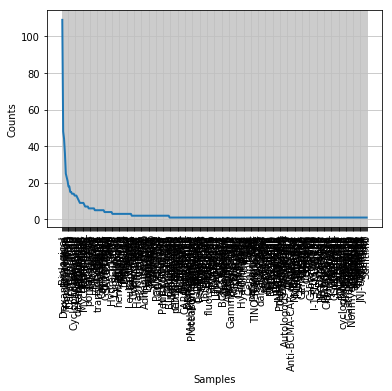

In [20]:
fdist1.plot()

In [21]:
word_lst2 = []
for i in range(len(words)):
    for j in range(len(words[i])):

        word_lst2.append(str(words[i][j]))
    
word_lst2

['DS-3032b',
 'ONC201',
 'Ixazomib',
 'Dexamethasone',
 'Biological',
 ':',
 'bb2121',
 'Biological',
 ':',
 'CAR2',
 'Anti-CD38',
 'A2',
 'CAR-T',
 'Cells',
 'Ixazomib',
 'Pomalidomide',
 'Dexamethasone',
 'Daratumumab',
 'SAR650984',
 'Carfilzomib',
 'Cabozantinib',
 'bb2121',
 'Daratumumab',
 'Pomalidomide',
 'Dexamethasone',
 'Bortezomib',
 'Ixazomib',
 'Lenalidomide',
 'Lenalidomide',
 'Biological',
 ':',
 'Nivolumab',
 'Bortezomib',
 'Biological',
 ':',
 'Daratumumab',
 'Dexamethasone',
 'Ixazomib',
 'Carfilzomib',
 'Dexamethasone',
 'Panobinostat',
 'ABC294640',
 'Dexamethasone',
 'Biological',
 ':',
 'Elotuzumab',
 'Pomalidomide',
 'ONC201',
 'Procedure',
 ':',
 'Autologous',
 'Hematopoietic',
 'Stem',
 'Cell',
 'Transplantation',
 'Dexamethasone',
 'Ixazomib',
 'Citrate',
 'Pomalidomide',
 'GSK2857916',
 'Lenalidomide',
 'Dexamethasone',
 'Bortezomib',
 'RP2D',
 'of',
 'GSK2857916',
 'Lintuzumab',
 'AC',
 '225',
 'ABI-009',
 'Pomalidomide',
 'Dexamethasone',
 'Procedure',
 ':'

In [22]:
word_lst2 = ''.join(word_lst2)

In [23]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=60).generate(word_lst2)

(-0.5, 399.5, 199.5, -0.5)

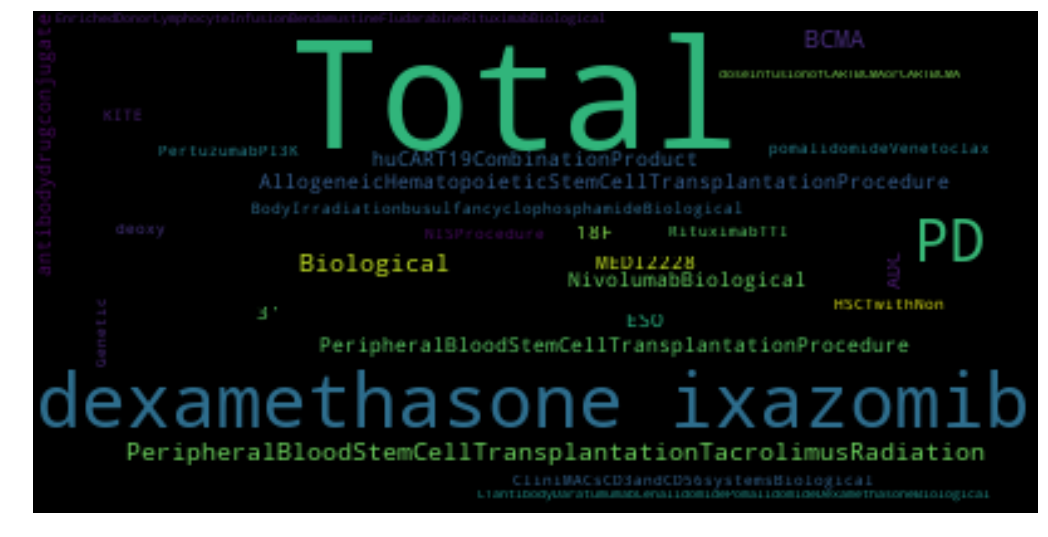

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")